# 사용자 지정 마스커 사용

여기에서는 SHAP 모델에 구애받지 않는 설명 방법에 사용자 지정 마스커를 제공하는 방법을 보여드립니다. 마스킹은 종종 도메인에 따라 달라질 수 있으므로 SHAP에 포함된 기본 방법 외에 데이터를 왜곡하는 다른 방법을 고려하는 것이 도움이 되는 경우가 많습니다.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


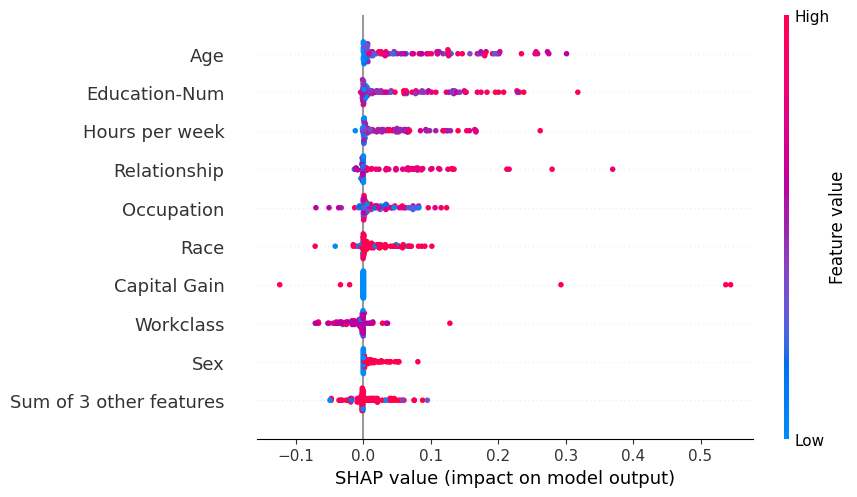

In [2]:
import xgboost
import shap
import numpy as np

# XGBoost 모델 훈련 
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X.values, y)

# 마스킹 함수는 이진 마스크 벡터를 첫 번째 인수로 받고 그 뒤에 단일 샘플에 대한 모델 인수를 받습니다. 
# 마스킹 함수는 입력 x의 마스킹된 버전을 반환하며, 여러 개의 행을 반환할 수 있습니다.
def custom_masker(mask, x):
    return (x * mask).reshape(1,len(x)) # in this simple example we just zero out the features we are masking

# SHAP 값 계산
explainer = shap.Explainer(model.predict_proba, custom_masker)
shap_values = explainer(X[:100])

# 양성 클래스에 대한 SHAP 값을 플롯합니다.
shap.plots.beeswarm(shap_values[...,1])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 